In [57]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
pink = '/content/pink.jpg'
purple = '/content/purple.jpg'
red = '/content/red.jpg'
yellow = '/content/yellow.jpg'

In [23]:
def display_img(path):
  img = cv2.imread(path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_cvt, (600, 600))
  plt.imshow(img_resized)
  plt.show()


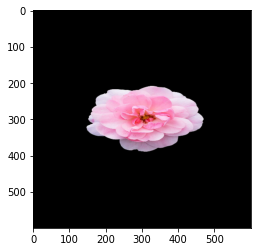

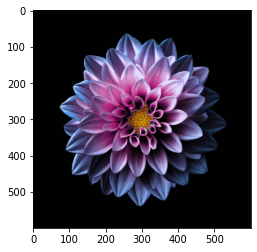

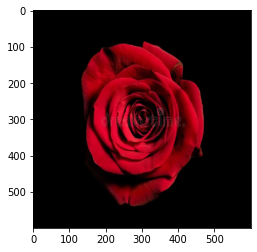

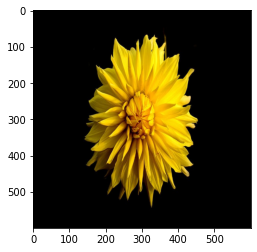

In [59]:
stimuli_list = [pink, purple, red, yellow]
for i in stimuli_list:
  display_img(i)

In [24]:
def sample(path):
  img = cv2.imread(path)
  img_resized = cv2.resize(img, (600, 600))
  return img_resized

def target(path):
  img = cv2.imread(path)
  img_resized = cv2.resize(img, (600, 600))
  return img_resized

In [54]:
##produce correlation coefficients

def produce_matching_matrix( stimuli_list, method = cv2.TM_CCOEFF_NORMED ): 
  df = pd.DataFrame(columns = ['pink', 'purple', 'red', 'yellow'], index = ['pink', 'purple', 'red', 'yellow'])
  for i in range(0,len(stimuli_list)):
    for j in range(0, len(stimuli_list)):
      df.iloc[i,j] = cv2.matchTemplate( sample(stimuli_list[i]), target(stimuli_list[j]), method)[0][0] 
  return df


In [55]:
df1 = produce_matching_matrix(stimuli_list= stimuli_list, method =  cv2.TM_CCOEFF_NORMED)

In [56]:
df1

,pink,purple,red,yellow
pink,1,0.318067,0.323885,0.436825
purple,0.318067,1,0.426861,0.476403
red,0.323885,0.426861,1,0.514531
yellow,0.436825,0.476403,0.514531,1
